In [1]:
#### visualize the motion_planning_dataset
data_folder = '/home/yinglong/Documents/research/learning_motion_planning/data/motion_planning_datasets/'


import numpy as np
import imageio

img = imageio.imread(data_folder+'/forest/train/0.png')

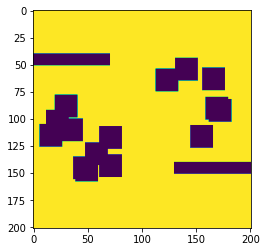

In [2]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [3]:
print(img.shape)
print(img)
# 255: freespace, 0: obstacle
# convert into a continuous-space planning problem: each pixel has certain range
# and we only care about obstacle as pixels

(201, 201)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [4]:
import sys
import importlib
import numpy as np
sys.path.append('../FasterRobusterMotionPlanningLibrary/python')
sys.path.append('../')

env_param = {'planner_type': 'informedrrtstar',
             'nearest_neighbor': 'naive_nearest_neighbor',
             'env_name': 'complex_2d',
             'plan_struct_type': 'plan_tree'}

In [5]:
# set up planner
planner_module = importlib.import_module('frmpl.planners.%s' % (env_param['planner_type']))
nearest_computer_module = importlib.import_module('frmpl.nearest_computer.%s' % (env_param['nearest_neighbor']))
plan_utility = importlib.import_module('frmpl.env.%s_utility' % (env_param['env_name']))
plan_struct_module = importlib.import_module('frmpl.planner_structure.%s' % (env_param['plan_struct_type']))

nearest_computer = nearest_computer_module.NearestComputer()

low = [-10., -10.]
high = [10., 10.]
low = np.array(low)
high = np.array(high)

plan_env = plan_utility.Environment(low, high)

collision_checker = plan_utility.CollisionChecker()
metrics = plan_utility.Metrics()
plan_struct = plan_struct_module.PlanStructure()


plan_env.set_obs(img, None)
collision_checker.set_env(plan_env)


sampled point: 
[[ 0.          0.        ]
 [ 0.          1.02040816]
 [ 0.          2.04081633]
 [ 0.          3.06122449]
 [ 0.          4.08163265]
 [ 0.          5.10204082]
 [ 0.          6.12244898]
 [ 0.          7.14285714]
 [ 0.          8.16326531]
 [ 0.          9.18367347]
 [ 0.         10.20408163]
 [ 0.         11.2244898 ]
 [ 0.         12.24489796]
 [ 0.         13.26530612]
 [ 0.         14.28571429]
 [ 0.         15.30612245]
 [ 0.         16.32653061]
 [ 0.         17.34693878]
 [ 0.         18.36734694]
 [ 0.         19.3877551 ]
 [ 0.         20.40816327]
 [ 0.         21.42857143]
 [ 0.         22.44897959]
 [ 0.         23.46938776]
 [ 0.         24.48979592]
 [ 0.         25.51020408]
 [ 0.         26.53061224]
 [ 0.         27.55102041]
 [ 0.         28.57142857]
 [ 0.         29.59183673]
 [ 0.         30.6122449 ]
 [ 0.         31.63265306]
 [ 0.         32.65306122]
 [ 0.         33.67346939]
 [ 0.         34.69387755]
 [ 0.         35.71428571]
 [ 0.       

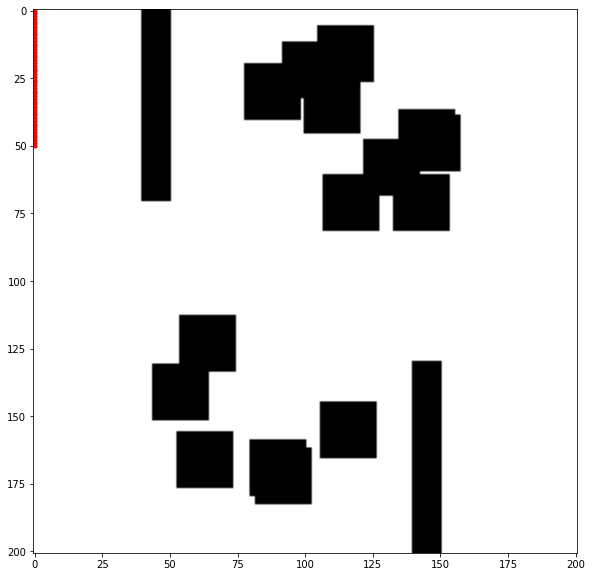

255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255


In [20]:
# test image coordinate
obs = img
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
#ax.set_xlim(-10, 10)
#ax.set_ylim(-10, 10)

obs_img = np.zeros(list(obs.T.shape) + [3]).astype(int)
obs_img[:,:,0] = obs.T
obs_img[:,:,1] = obs.T
obs_img[:,:,2] = obs.T
origin = 'lower'
extent = (-10, 10., -10., 10.)
ax.imshow(obs_img)#, origin=origin, extent=extent)

# sample point
x = np.linspace([0., 0.], [0., 50.], 50)
#x = np.random.uniform(low=low, high=high)
print('sampled point: ')
print(x)
ax.scatter(x[:,0], x[:,1], c='red', s=10.0)
#print('collision checker: ')
#print(collision_checker.invalid(x))
plt.show()

for i in range(50):
    print(obs[int(x[i,0]), int(x[i,1])])

sampled point: 
[-0.75124132  2.51751969]
collision checker: 
pixel index: 
[ 92 125]
False


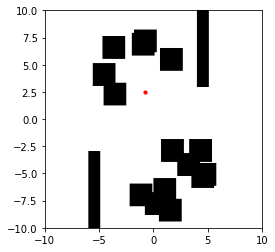

In [34]:
# viusalize collision checker
obs = img
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

obs_img = np.zeros(list(obs.T.shape) + [3]).astype(int)
obs_img[:,:,0] = obs.T
obs_img[:,:,1] = obs.T
obs_img[:,:,2] = obs.T
origin = 'lower'
extent = (-10, 10., -10., 10.)
ax.imshow(obs_img, origin=origin, extent=extent)

# sample point
x = np.random.uniform(low=low, high=high)
print('sampled point: ')
print(x)
ax.scatter(x[0], x[1], c='red', s=10.0)
print('collision checker: ')
print(collision_checker.invalid(x))
plt.show()


Text(0, 0.5, 'Y axis label')

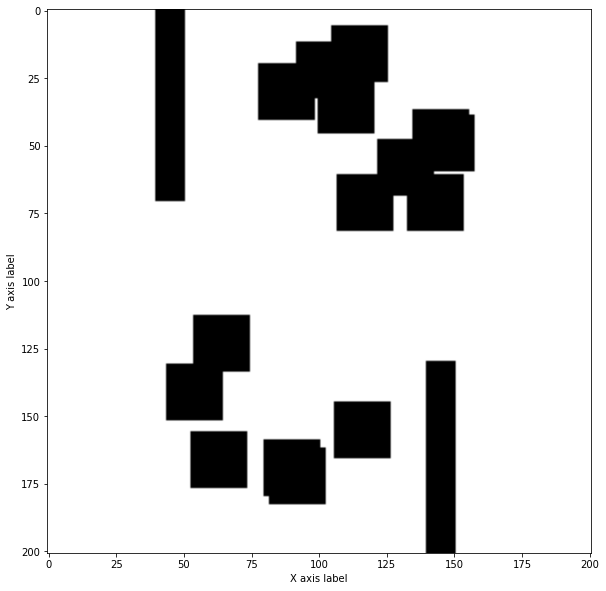

In [22]:
fig = plt.figure(figsize=(10,10))
plt.imshow(obs_img)
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

path: 
[[-5.10824424  1.72159507]
 [-4.83538686  1.2836513 ]
 [-1.06680708  0.54529324]
 [ 4.11392151 -0.47146344]
 [ 6.09433822 -0.85657635]]
cost: 
[0.51599021 3.84022996 5.27955897 2.01751389]
time: 
5.233456611633301
sg:
[array([-5.10824424,  1.72159507]), array([ 6.06083137, -0.84219145])]


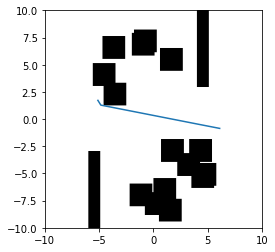

In [43]:
# test stored path
import pickle

path_dir = '/home/yinglong/Documents/research/learning_motion_planning/data/motion_planning_datasets/forest/'
path_name = path_dir + 'path/0/state_1.pkl'
f = open(path_name, 'rb')
path = pickle.load(f)
cost_name = path_dir + 'path/0/cost_1.pkl'
f = open(cost_name, 'rb')
cost = pickle.load(f)
time_name = path_dir + 'path/0/time_1.pkl'
f = open(time_name, 'rb')
time = pickle.load(f)
sg_name = path_dir + 'path/0/start_goal_1.pkl'
f = open(sg_name, 'rb')
sg = pickle.load(f)

print('path: ')
print(path)
print("cost: ")
print(cost)
print('time: ')
print(time)
print('sg:')
print(sg)

obs = img
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

obs_img = np.zeros(list(obs.T.shape) + [3]).astype(int)
obs_img[:,:,0] = obs.T
obs_img[:,:,1] = obs.T
obs_img[:,:,2] = obs.T
origin = 'lower'
extent = (-10, 10., -10., 10.)
ax.imshow(obs_img, origin=origin, extent=extent)


ax.plot(path[:,0], path[:,1])


plt.show()


In [44]:
# test stored path
import pickle

path_dir = '/home/yinglong/Documents/research/learning_motion_planning/data/motion_planning_datasets/forest/'
time_all = []
for i in range(10):
    time_i = []
    for j in range(10):        
        time_name = path_dir + 'path/%d/time_%d.pkl' % (i, j)
        f = open(time_name, 'rb')
        time = pickle.load(f)
        time_i.append(time)
        #print('time: ')
        #print(time)
    time_all.append(time_i)
time_all = np.array(time_all)
time_all.mean(axis=1)

array([ 9.78421364,  8.24938877,  8.39627769,  7.92194118,  9.95570958,
        8.51769819,  7.67279782, 10.02449913,  9.94465001,  8.90962465])